<a href="https://colab.research.google.com/github/MatiasSiles/Sales-Optimization/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# @title
# # @title
# import pandas as pd
# import numpy as np
# from datetime import datetime, timedelta
# import random
# from faker import Faker
# import warnings
# warnings.filterwarnings('ignore')

# # Set seed for reproducibility
# np.random.seed(42)
# random.seed(42)
# fake = Faker('en_US')
# Faker.seed(42)

# def generate_sales_dataset(n_records=10000):
#     """
#     Generate a comprehensive sales dataset with realistic business patterns and noise
#     """

#     # Define business parameters
#     start_date = datetime(2020, 1, 1)
#     end_date = datetime(2024, 12, 31)

#     # Product categories and their characteristics
#     product_categories = {
#         'Electronics': {'avg_price': 450, 'std_price': 200, 'seasonal_factor': 1.3},
#         'Clothing': {'avg_price': 85, 'std_price': 35, 'seasonal_factor': 1.2},
#         'Home & Garden': {'avg_price': 120, 'std_price': 60, 'seasonal_factor': 1.1},
#         'Sports & Outdoors': {'avg_price': 95, 'std_price': 45, 'seasonal_factor': 1.4},
#         'Books': {'avg_price': 25, 'std_price': 15, 'seasonal_factor': 0.9},
#         'Health & Beauty': {'avg_price': 55, 'std_price': 25, 'seasonal_factor': 1.0},
#         'Automotive': {'avg_price': 180, 'std_price': 80, 'seasonal_factor': 1.1},
#         'Toys & Games': {'avg_price': 45, 'std_price': 25, 'seasonal_factor': 1.5}
#     }

#     # Sales channels
#     sales_channels = ['Online', 'Retail Store', 'Phone', 'Mobile App', 'Third Party']
#     channel_weights = [0.4, 0.3, 0.1, 0.15, 0.05]

#     # Customer segments
#     customer_segments = ['Premium', 'Standard', 'Budget', 'Enterprise']
#     segment_weights = [0.2, 0.4, 0.3, 0.1]

#     # Regions
#     regions = ['North America', 'Europe', 'Asia Pacific', 'Latin America', 'Middle East & Africa']
#     region_weights = [0.35, 0.25, 0.2, 0.15, 0.05]

#     # Payment methods
#     payment_methods = ['Credit Card', 'Debit Card', 'PayPal', 'Bank Transfer', 'Cash', 'Cryptocurrency']
#     payment_weights = [0.4, 0.25, 0.15, 0.1, 0.08, 0.02]

#     # Generate data
#     data = []

#     for i in range(n_records):
#         # Generate date with business patterns
#         date = fake.date_between(start_date=start_date, end_date=end_date)

#         # Add seasonality effects
#         month = date.month
#         is_holiday_season = month in [11, 12]  # November, December
#         is_summer = month in [6, 7, 8]  # June, July, August
#         is_back_to_school = month in [8, 9]  # August, September

#         # Select product category
#         category = np.random.choice(list(product_categories.keys()))
#         cat_info = product_categories[category]

#         # Generate product name
#         product_adjectives = ['Premium', 'Deluxe', 'Standard', 'Basic', 'Pro', 'Elite', 'Classic']
#         product_nouns = ['Widget', 'Device', 'Tool', 'Kit', 'Set', 'System', 'Unit', 'Package']
#         product_name = f"{random.choice(product_adjectives)} {random.choice(product_nouns)} {random.randint(100, 999)}"

#         # Generate price with noise and seasonality
#         base_price = np.random.normal(cat_info['avg_price'], cat_info['std_price'])
#         seasonal_multiplier = 1.0

#         if is_holiday_season:
#             seasonal_multiplier *= cat_info['seasonal_factor']
#         if category == 'Sports & Outdoors' and is_summer:
#             seasonal_multiplier *= 1.2
#         if category == 'Books' and is_back_to_school:
#             seasonal_multiplier *= 1.3

#         unit_price = max(base_price * seasonal_multiplier, 5)  # Minimum price of $5

#         # Generate quantity with business logic
#         if category == 'Electronics':
#             quantity = np.random.choice([1, 2, 3], p=[0.7, 0.2, 0.1])
#         elif category == 'Books':
#             quantity = np.random.choice([1, 2, 3, 4, 5], p=[0.4, 0.3, 0.15, 0.1, 0.05])
#         else:
#             quantity = np.random.choice([1, 2, 3, 4], p=[0.6, 0.25, 0.1, 0.05])

#         # Calculate total amount
#         subtotal = unit_price * quantity

#         # Apply discounts
#         discount_rate = 0
#         if np.random.random() < 0.3:  # 30% chance of discount
#             if is_holiday_season:
#                 discount_rate = np.random.uniform(0.05, 0.25)  # 5-25% holiday discount
#             else:
#                 discount_rate = np.random.uniform(0.02, 0.15)  # 2-15% regular discount

#         discount_amount = subtotal * discount_rate

#         # Calculate tax (varies by region)
#         region = np.random.choice(regions, p=region_weights)
#         tax_rates = {'North America': 0.08, 'Europe': 0.20, 'Asia Pacific': 0.10,
#                     'Latin America': 0.15, 'Middle East & Africa': 0.05}
#         tax_rate = tax_rates[region]
#         tax_amount = (subtotal - discount_amount) * tax_rate

#         total_amount = subtotal - discount_amount + tax_amount

#         # Generate customer information
#         customer_id = f"CUST_{random.randint(10000, 99999)}"
#         customer_segment = np.random.choice(customer_segments, p=segment_weights)

#         # Generate sales rep
#         sales_rep = fake.name()

#         # Generate other fields
#         sales_channel = np.random.choice(sales_channels, p=channel_weights)
#         payment_method = np.random.choice(payment_methods, p=payment_weights)

#         # Generate order ID
#         order_id = f"ORD_{date.strftime('%Y%m%d')}_{random.randint(1000, 9999)}"

#         # Add noise and realistic business issues
#         # Missing values (simulate real-world data issues)
#         customer_age = np.random.randint(18, 80) if np.random.random() > 0.05 else None
#         customer_gender = np.random.choice(['Male', 'Female', 'Other']) if np.random.random() > 0.03 else None

#         # Shipping info
#         shipping_cost = 0
#         if sales_channel in ['Online', 'Mobile App', 'Phone']:
#             if total_amount < 50:
#                 shipping_cost = np.random.uniform(5, 15)
#             elif total_amount < 100:
#                 shipping_cost = np.random.uniform(0, 8)

#         # Return/refund status
#         is_returned = np.random.random() < 0.08  # 8% return rate
#         return_reason = None
#         if is_returned:
#             return_reasons = ['Defective', 'Wrong Item', 'Not as Described', 'Changed Mind', 'Damaged in Shipping']
#             return_reason = np.random.choice(return_reasons)

#         # Customer satisfaction score (1-10)
#         if is_returned:
#             satisfaction_score = np.random.randint(1, 4)
#         else:
#             satisfaction_score = np.random.randint(6, 11) if np.random.random() > 0.1 else None

#         # Lead source
#         lead_sources = ['Organic Search', 'Paid Search', 'Social Media', 'Email', 'Referral', 'Direct', 'Advertisement']
#         lead_source = np.random.choice(lead_sources)

#         # Add data quality issues (noise)
#         # Occasional outliers
#         if np.random.random() < 0.001:  # 0.1% chance of extreme outlier
#             quantity = random.randint(50, 200)
#             total_amount = unit_price * quantity

#         # Occasional data entry errors
#         if np.random.random() < 0.002:  # 0.2% chance of data entry error
#             unit_price = unit_price * random.choice([0.1, 10])  # Price too low or too high

#         # Round monetary values
#         unit_price = round(unit_price, 2)
#         subtotal = round(subtotal, 2)
#         discount_amount = round(discount_amount, 2)
#         tax_amount = round(tax_amount, 2)
#         total_amount = round(total_amount, 2)
#         shipping_cost = round(shipping_cost, 2)

#         # Create record
#         record = {
#             'order_id': order_id,
#             'date': date,
#             'customer_id': customer_id,
#             'customer_age': customer_age,
#             'customer_gender': customer_gender,
#             'customer_segment': customer_segment,
#             'product_category': category,
#             'product_name': product_name,
#             'unit_price': unit_price,
#             'quantity': quantity,
#             'subtotal': subtotal,
#             'discount_rate': round(discount_rate, 4),
#             'discount_amount': discount_amount,
#             'tax_rate': round(tax_rate, 4),
#             'tax_amount': tax_amount,
#             'shipping_cost': shipping_cost,
#             'total_amount': total_amount,
#             'sales_channel': sales_channel,
#             'payment_method': payment_method,
#             'region': region,
#             'sales_rep': sales_rep,
#             'lead_source': lead_source,
#             'is_returned': is_returned,
#             'return_reason': return_reason,
#             'satisfaction_score': satisfaction_score
#         }

#         data.append(record)

#     # Convert to DataFrame
#     df = pd.DataFrame(data)

#     # Add additional computed columns
#     df["date"] = pd.to_datetime(df["date"])
#     df['year'] = df['date'].dt.year
#     df['month'] = df['date'].dt.month
#     df['quarter'] = df['date'].dt.quarter
#     df['day_of_week'] = df['date'].dt.day_name()
#     df['is_weekend'] = df['date'].dt.weekday >= 5
#     df['profit_margin'] = np.random.uniform(0.15, 0.45, len(df))  # 15-45% profit margin
#     df['profit'] = df['total_amount'] * df['profit_margin']

#     # Add some duplicate records (realistic data issue)
#     if len(df) > 100:
#         duplicate_indices = np.random.choice(df.index, size=int(len(df) * 0.01), replace=False)
#         duplicates = df.loc[duplicate_indices].copy()
#         df = pd.concat([df, duplicates], ignore_index=True)

#     # Shuffle the dataset
#     df = df.sample(frac=1).reset_index(drop=True)

#     return df

# # Generate the dataset
# print("Generating professional sales dataset...")
# sales_df = generate_sales_dataset(n_records=12000)
# sales_df

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

In [18]:
# 1. DATA LOADING AND INITIAL EXPLORATION

df = pd.read_csv("/content/Sales_Business.csv")

print("=== DATASET OVERVIEW ===")
print(f"Dataset Shape: {df.shape}")
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== COLUMN INFORMATION ===")
print(df.info())

=== DATASET OVERVIEW ===
Dataset Shape: (12120, 32)
Memory Usage: 12.04 MB

=== COLUMN INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12120 entries, 0 to 12119
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            12120 non-null  object 
 1   date                12120 non-null  object 
 2   customer_id         12120 non-null  object 
 3   customer_age        11514 non-null  float64
 4   customer_gender     11741 non-null  object 
 5   customer_segment    12120 non-null  object 
 6   product_category    12120 non-null  object 
 7   product_name        12120 non-null  object 
 8   unit_price          12120 non-null  float64
 9   quantity            12120 non-null  int64  
 10  subtotal            12120 non-null  float64
 11  discount_rate       12120 non-null  float64
 12  discount_amount     12120 non-null  float64
 13  tax_rate            12120 non-null  float64
 14 

In [19]:
print("=== 2. DATA QUALITY ASSESSMENT ===")

# Missing values analysis
missing_data = pd.DataFrame({
'Column': df.columns,
'Missing_Count': df.isnull().sum(),
'Missing_Percentage': round((df.isnull().sum() / len(df))*100,2),
'Data_Type': df.dtypes
})

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
missing_data = missing_data.reset_index(drop=True)

# Duplicate analysis
duplicates = df.duplicated().sum()
print(f"\nDUPLICATE ROWS IN THE TOTAL DF: {duplicates} ({duplicates/len(df)*100:.2f}%)")

# Unique values per column
print("\n\nUNIQUE VALUES PER COLUMN:\n")
for col in df.columns:
  unique_count = df[col].nunique()
  print(f"{col}: {unique_count}")

print("\n\nMISSING VALUES:\n")
missing_data

=== 2. DATA QUALITY ASSESSMENT ===

DUPLICATE ROWS IN THE TOTAL DF: 120 (0.99%)


UNIQUE VALUES PER COLUMN:

order_id: 11995
date: 1823
customer_id: 11192
customer_age: 62
customer_gender: 3
customer_segment: 4
product_category: 8
product_name: 10679
unit_price: 9344
quantity: 17
subtotal: 10032
discount_rate: 1457
discount_amount: 2328
tax_rate: 5
tax_amount: 5008
shipping_cost: 1263
total_amount: 10230
sales_channel: 5
payment_method: 6
region: 5
sales_rep: 11121
lead_source: 7
is_returned: 2
return_reason: 5
satisfaction_score: 8
year: 5
month: 12
quarter: 4
day_of_week: 7
is_weekend: 2
profit_margin: 12000
profit: 12000


MISSING VALUES:



,Column,Missing_Count,Missing_Percentage,Data_Type
0,return_reason,11156,92.05,object
1,satisfaction_score,1082,8.93,float64
2,customer_age,606,5.00,float64
3,customer_gender,379,3.13,object


In [20]:
print("=== 3. STATISTICAL ANALYSIS ===")

# Numerical columns for statistical analysis (id columns do not work for "describe()")
numerical_cols = ['customer_age', 'unit_price', 'quantity', 'subtotal',
                  'discount_rate', 'discount_amount', 'tax_rate', 'tax_amount',
                  'shipping_cost', 'total_amount', 'satisfaction_score',
                  'profit_margin', 'profit']

print("\nNUMERICAL VARIABLES SUMMARY:")
print(df[numerical_cols].describe().round(2))

# Categorical columns analysis
categorical_cols = ['customer_gender', 'customer_segment', 'product_category',
                    'sales_channel', 'payment_method', 'region', 'lead_source',
                    'return_reason', 'day_of_week']

print("\n\nCATEGORICAL VARIABLES SUMMARY:")
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        print("-"*20)
        print(df[col].value_counts())

=== 3. STATISTICAL ANALYSIS ===

NUMERICAL VARIABLES SUMMARY:
       customer_age  unit_price  quantity  subtotal  discount_rate  \
count      11514.00    12120.00  12120.00  12120.00       12120.00   
mean          48.58      139.66      1.77    212.22           0.03   
std           17.92      160.45      4.33    268.82           0.05   
min           18.00        0.50      1.00      5.00           0.00   
25%           33.00       44.36      1.00     60.65           0.00   
50%           49.00       85.88      1.00    121.93           0.00   
75%           64.00      160.89      2.00    246.97           0.05   
max           79.00     1332.64    173.00   3129.11           0.25   

       discount_amount  tax_rate  tax_amount  shipping_cost  total_amount  \
count         12120.00  12120.00    12120.00       12120.00      12120.00   
mean              6.42      0.12       25.28           1.68        245.68   
std              21.36      0.05       36.39           3.49        623.08   

=== 4. OUTLIER DETECTION ===


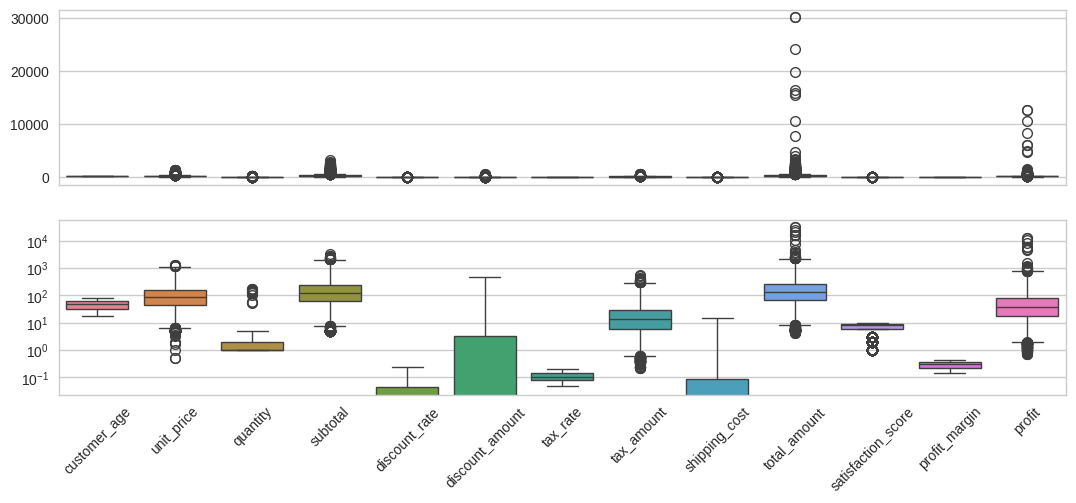


Columns with outliers


,Column,IQR_Outliers,IQR_Percentage,Z_Score_Outliers,Z_Score_Percentage
0,customer_age,0,0.000000,0,0.000000
1,unit_price,1208,9.966997,336,2.772277
2,quantity,705,5.816832,13,0.107261
3,subtotal,1147,9.463696,270,2.227723
4,discount_rate,1181,9.744224,226,1.864686
5,discount_amount,2159,17.813531,219,1.806931
6,tax_rate,0,0.000000,0,0.000000
7,tax_amount,1124,9.273927,248,2.046205
8,shipping_cost,3000,24.752475,357,2.945545
9,total_amount,1142,9.422442,44,0.363036


In [21]:
print("=== 4. OUTLIER DETECTION ===")

outlier_summary = []

for col in numerical_cols:
    if col in df.columns and df[col].dtype in ['int64', 'float64']:
        # IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col].count()

        # Z-score method (threshold = 3)
        z_scores = np.abs(stats.zscore(df[col].dropna()))
        z_outliers = (z_scores > 3).sum()

        outlier_summary.append({
            'Column': col,
            'IQR_Outliers': iqr_outliers,
            'IQR_Percentage': (iqr_outliers/len(df))*100,
            'Z_Score_Outliers': z_outliers,
            'Z_Score_Percentage': (z_outliers/len(df))*100
        })

outlier_df = pd.DataFrame(outlier_summary)

fig, axes = plt.subplots(2,1, sharex=True, figsize=(13,5))
sns.boxplot(df[numerical_cols], ax=axes[0])
plt.yscale("log")

sns.boxplot(df[numerical_cols], ax=axes[1])
plt.xticks(rotation=45)
plt.show()

print()
print("Columns with outliers")
outlier_df

In [22]:
df.columns

Index(['order_id', 'date', 'customer_id', 'customer_age', 'customer_gender',
       'customer_segment', 'product_category', 'product_name', 'unit_price',
       'quantity', 'subtotal', 'discount_rate', 'discount_amount', 'tax_rate',
       'tax_amount', 'shipping_cost', 'total_amount', 'sales_channel',
       'payment_method', 'region', 'sales_rep', 'lead_source', 'is_returned',
       'return_reason', 'satisfaction_score', 'year', 'month', 'quarter',
       'day_of_week', 'is_weekend', 'profit_margin', 'profit'],
      dtype='object')

#Visualizations

Sales vs Time shows the business's seasonality, it's possible sales have hidden patterns like special days, black fridays, etc, that probrably influed in the business's sales

In [ ]:
df_Sales_vs_Time = df[["date", "total_amount"]].sort_values("date")
df_Sales_vs_Time = df_Sales_vs_Time.set_index("date")
df_Sales_vs_Time.plot(figsize=(12,6))
plt.title("Ventas en el tiempo")
plt.xlabel("Fecha")
plt.ylabel("Ventas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print("=== CREATING VISUALIZATIONS ===")
plt.style.use('seaborn-v0_8')

# Distribution plots for numerical variables
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 25))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:15]):
    if col in df.columns:
        df[col].hist(bins=30, ax=axes[idx], alpha=0.7)
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Box plots more specifics for each numerical column
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 25))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols[:15]):
    if col in df.columns:
        df.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(15, 12))
numeric_df = df[numerical_cols]
correlation_matrix = numeric_df.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
            center=0, square=True, fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

# 4. Categorical variables visualization
for col in categorical_cols[:6]:
    if col in df.columns:
        plt.figure(figsize=(12, 6))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

Metrics:

In [ ]:
df['sales_rep'].unique()

In [ ]:
# SALES PERFORMANCE
print(f"Total Revenue: ${df['total_amount'].sum():,.2f}")
print(f"EBITDA: ${(df['total_amount'] - df['shipping_cost'])}") # if shipping cost is logistics cost
print(f"Average Order Price: ${df['total_amount'].mean():.2f}")
print(f"Total Orders: {df['order_id'].nunique():,}")
print(f"Total Customers: {df['customer_id'].nunique():,}")
print(f"Average Customer Age: {np.floor(df['customer_age'].mean())}")

In [ ]:
# ========================================
# 6. BUSINESS INSIGHTS ANALYSIS
# ========================================

def business_insights_analysis(df):
    """Generate business-specific insights"""

    print("=== BUSINESS INSIGHTS ANALYSIS ===")

    # Sales performance metrics
    print("SALES PERFORMANCE METRICS:")
    print(f"Total Revenue: ${df['total_amount'].sum():,.2f}")
    print(f"Average Order Value: ${df['total_amount'].mean():.2f}")
    print(f"Total Orders: {df['order_id'].nunique():,}")
    print(f"Total Customers: {df['customer_id'].nunique():,}")
    print(f"Average Customer Age: {df['customer_age'].mean():.1f}")

    # Return analysis
    return_rate = (df['is_returned'].sum() / len(df)) * 100
    print(f"Return Rate: {return_rate:.2f}%")

    # Profitability analysis
    print(f"\nPROFITABILITY METRICS:")
    print(f"Total Profit: ${df['profit'].sum():,.2f}")
    print(f"Average Profit Margin: {df['profit_margin'].mean():.2f}%")
    print(f"Profit per Order: ${df['profit'].mean():.2f}")

    # Channel performance
    print(f"\nCHANNEL PERFORMANCE:")
    channel_performance = df.groupby('sales_channel').agg({
        'total_amount': ['sum', 'mean', 'count'],
        'profit': 'sum'
    }).round(2)
    print(channel_performance)

    # Customer segmentation analysis
    print(f"\nCUSTOMER SEGMENT ANALYSIS:")
    segment_analysis = df.groupby('customer_segment').agg({
        'total_amount': ['sum', 'mean'],
        'profit': 'sum',
        'satisfaction_score': 'mean'
    }).round(2)
    print(segment_analysis)

# ========================================
# 7. FEATURE ENGINEERING
# ========================================

def feature_engineering(df):
    """Comprehensive feature engineering for predictive modeling"""

    print("=== FEATURE ENGINEERING ===")

    # Create a copy for feature engineering
    df_fe = df.copy()

    # 1. Date-based features
    df_fe['date'] = pd.to_datetime(df_fe['date'])
    df_fe['days_since_start'] = (df_fe['date'] - df_fe['date'].min()).dt.days
    df_fe['week_of_year'] = df_fe['date'].dt.isocalendar().week
    df_fe['is_month_start'] = df_fe['date'].dt.is_month_start.astype(int)
    df_fe['is_month_end'] = df_fe['date'].dt.is_month_end.astype(int)
    df_fe['is_quarter_start'] = df_fe['date'].dt.is_quarter_start.astype(int)
    df_fe['is_quarter_end'] = df_fe['date'].dt.is_quarter_end.astype(int)

    # 2. Customer-based features
    # Customer frequency and recency
    customer_stats = df_fe.groupby('customer_id').agg({
        'order_id': 'count',
        'total_amount': ['sum', 'mean'],
        'profit': 'sum',
        'date': ['min', 'max']
    })
    customer_stats.columns = ['order_frequency', 'total_spent', 'avg_order_value',
                             'total_profit_generated', 'first_purchase', 'last_purchase']

    # Calculate recency (days since last purchase)
    customer_stats['recency_days'] = (df_fe['date'].max() - customer_stats['last_purchase']).dt.days
    customer_stats['customer_lifetime_days'] = (customer_stats['last_purchase'] - customer_stats['first_purchase']).dt.days

    # Merge back to main dataset
    df_fe = df_fe.merge(customer_stats, left_on='customer_id', right_index=True, how='left')

    # 3. Product-based features
    # Product performance metrics
    product_stats = df_fe.groupby('product_name').agg({
        'quantity': 'sum',
        'total_amount': 'sum',
        'profit_margin': 'mean',
        'is_returned': 'mean'
    })
    product_stats.columns = ['product_total_qty_sold', 'product_total_revenue',
                            'product_avg_margin', 'product_return_rate']

    df_fe = df_fe.merge(product_stats, left_on='product_name', right_index=True, how='left')

    # 4. Sales representative performance
    rep_stats = df_fe.groupby('sales_rep').agg({
        'total_amount': ['sum', 'mean'],
        'profit': 'sum',
        'satisfaction_score': 'mean'
    })
    rep_stats.columns = ['rep_total_sales', 'rep_avg_order_value',
                        'rep_total_profit', 'rep_avg_satisfaction']

    df_fe = df_fe.merge(rep_stats, left_on='sales_rep', right_index=True, how='left')

    # 5. Discount and pricing features
    df_fe['discount_impact'] = df_fe['discount_amount'] / df_fe['subtotal']
    df_fe['effective_price'] = df_fe['unit_price'] * (1 - df_fe['discount_rate'])
    df_fe['price_per_profit_ratio'] = df_fe['unit_price'] / (df_fe['profit'] + 0.01)  # Avoid division by zero
    df_fe['is_high_discount'] = (df_fe['discount_rate'] > df_fe['discount_rate'].quantile(0.75)).astype(int)
    df_fe['discount_category'] = pd.cut(df_fe['discount_rate'],
                                       bins=[0, 0.05, 0.15, 0.25, 1.0],
                                       labels=['No_Discount', 'Low_Discount', 'Medium_Discount', 'High_Discount'])

    # 6. Order complexity features
    df_fe['order_complexity'] = df_fe['quantity'] * df_fe.groupby('order_id')['product_name'].transform('nunique')
    df_fe['is_bulk_order'] = (df_fe['quantity'] > df_fe['quantity'].quantile(0.8)).astype(int)
    df_fe['shipping_to_total_ratio'] = df_fe['shipping_cost'] / df_fe['total_amount']

    # 7. Seasonal and cyclical features
    df_fe['is_holiday_season'] = ((df_fe['month'] == 12) | (df_fe['month'] == 1)).astype(int)
    df_fe['is_summer_season'] = ((df_fe['month'] >= 6) & (df_fe['month'] <= 8)).astype(int)
    df_fe['is_back_to_school'] = ((df_fe['month'] == 8) | (df_fe['month'] == 9)).astype(int)

    # 8. Risk and quality indicators
    df_fe['customer_risk_score'] = (
        (df_fe['recency_days'] > df_fe['recency_days'].quantile(0.75)) * 0.3 +
        (df_fe['satisfaction_score'] < df_fe['satisfaction_score'].quantile(0.25)) * 0.4 +
        (df_fe['is_returned'] == 1) * 0.3
    )

    # 9. Encoding categorical variables
    # One-hot encoding for low cardinality categorical variables
    categorical_to_encode = ['customer_gender', 'customer_segment', 'sales_channel',
                           'payment_method', 'day_of_week', 'discount_category']

    for col in categorical_to_encode:
        if col in df_fe.columns:
            dummies = pd.get_dummies(df_fe[col], prefix=col, drop_first=True)
            df_fe = pd.concat([df_fe, dummies], axis=1)

    # Target encoding for high cardinality categorical variables
    high_cardinality_cols = ['product_category', 'product_name', 'region', 'sales_rep', 'lead_source']
    target_col = 'total_amount'  # Can be changed based on prediction target

    for col in high_cardinality_cols:
        if col in df_fe.columns:
            target_mean = df_fe.groupby(col)[target_col].mean()
            df_fe[f'{col}_target_encoded'] = df_fe[col].map(target_mean)

    # 10. Interaction features
    df_fe['age_segment_interaction'] = df_fe['customer_age'] * df_fe['customer_segment_Premium']
    df_fe['price_quantity_interaction'] = df_fe['unit_price'] * df_fe['quantity']
    df_fe['discount_satisfaction_interaction'] = df_fe['discount_rate'] * df_fe['satisfaction_score']

    print(f"Original features: {df.shape[1]}")
    print(f"Features after engineering: {df_fe.shape[1]}")
    print(f"New features created: {df_fe.shape[1] - df.shape[1]}")

    return df_fe

# ========================================
# 8. FEATURE SELECTION AND PREPARATION
# ========================================

def prepare_features_for_modeling(df_fe):
    """Prepare features for machine learning models"""

    print("=== FEATURE PREPARATION FOR MODELING ===")

    # Remove features not suitable for modeling
    columns_to_drop = ['order_id', 'customer_id', 'product_name', 'date',
                      'first_purchase', 'last_purchase', 'sales_rep']

    # Create modeling dataset
    df_model = df_fe.drop(columns=[col for col in columns_to_drop if col in df_fe.columns])

    # Handle remaining missing values
    # Numerical columns: fill with median
    numerical_cols = df_model.select_dtypes(include=[np.number]).columns
    df_model[numerical_cols] = df_model[numerical_cols].fillna(df_model[numerical_cols].median())

    # Categorical columns: fill with mode
    categorical_cols = df_model.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df_model[col] = df_model[col].fillna(df_model[col].mode()[0])

    # Feature importance analysis using correlation with target variables
    target_variables = ['total_amount', 'profit', 'satisfaction_score', 'is_returned']

    print("TOP 20 FEATURES BY CORRELATION WITH TARGETS:")
    for target in target_variables:
        if target in df_model.columns:
            correlations = df_model.corr()[target].abs().sort_values(ascending=False)
            print(f"\nTop features correlated with {target}:")
            print(correlations.head(10))

    print(f"\nFinal dataset shape for modeling: {df_model.shape}")
    print(f"Features ready for ML: {df_model.shape[1]}")

    return df_model

# ========================================
# 9. MAIN EXECUTION FUNCTION
# ========================================

def main_eda_pipeline(file_path):
    """Execute complete EDA and feature engineering pipeline"""

    print("STARTING COMPREHENSIVE EDA AND FEATURE ENGINEERING PIPELINE")
    print("=" * 70)

    # Step 1: Load and explore data
    df = load_and_explore_data(file_path)

    # Step 2: Assess data quality
    missing_data = assess_data_quality(df)

    # Step 3: Statistical analysis
    numerical_cols, categorical_cols = statistical_analysis(df)

    # Step 4: Outlier detection
    outlier_summary = detect_outliers(df, numerical_cols)

    # Step 5: Create visualizations
    create_visualizations(df, numerical_cols, categorical_cols)

    # Step 6: Business insights
    business_insights_analysis(df)

    # Step 7: Feature engineering
    df_engineered = feature_engineering(df)

    # Step 8: Prepare for modeling
    df_final = prepare_features_for_modeling(df_engineered)

    print("\n" + "=" * 70)
    print("EDA AND FEATURE ENGINEERING PIPELINE COMPLETED SUCCESSFULLY")
    print("=" * 70)

    return df, df_engineered, df_final

# ========================================
# 10. EXECUTION
# ========================================

if __name__ == "__main__":
    # Execute the complete pipeline
    file_path = "sales_dataset.csv"  # Replace with your file path

    original_df, engineered_df, final_df = main_eda_pipeline(file_path)

    # Save processed datasets
    engineered_df.to_csv("sales_dataset_engineered.csv", index=False)
    final_df.to_csv("sales_dataset_final_for_modeling.csv", index=False)

    print("Processed datasets saved successfully!")
    print("- sales_dataset_engineered.csv: Dataset with all engineered features")
    print("- sales_dataset_final_for_modeling.csv: Clean dataset ready for ML models")